<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-6/Clustering%20SKLearn/birch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arya Fridayana Gastiadi

1103210082

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from time import time
from sklearn.cluster import Birch

BIRCH without global clustering as the final step took 0.11 seconds
n_clusters : 25


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (25) by BIRCH is less than (100). Decrease the threshold.
  warnings.warn(


BIRCH with global clustering as the final step took 0.20 seconds
n_clusters : 25


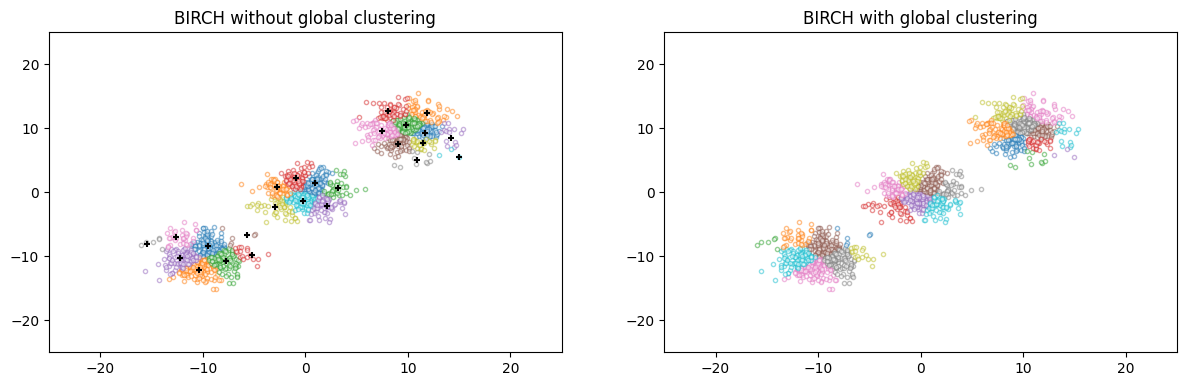

In [37]:
# Membuat center sehingga membuat grid sebesar 10x10
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)
xx, yy = np.meshgrid(xx, yy)
n_centers = np.hstack((np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]))

# Menggunakan semua warna yang disediakan matplotlib
colors_ = cycle(plt.cm.tab10.colors)

# Generate some data points for clustering
np.random.seed(0)
n_samples = 1500
X = np.random.randn(n_samples, 2) * 2
X[:500, :] += 10
X[500:1000, :] -= 10

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.1, top=0.9)

# Menghitung cluster dengan BIRCH
birch_models = [
    Birch(threshold=1.7, n_clusters=None),
    Birch(threshold=1.7, n_clusters=100),
]
final_step = ["without global clustering", "with global clustering"]

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    # Plot result
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 2, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c="w", edgecolor=col, marker=".", alpha=0.5)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="+", c="k", s=25)
    ax.set_ylim([-25, 25])
    ax.set_xlim([-25, 25])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

plt.show()